<a href="https://colab.research.google.com/github/coderpaulo/introducao_data_science/blob/main/Introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando filmes em geral

In [1]:
import pandas as pd  #importa o pandas para uso

notas = pd.read_csv("ratings.csv") #carregando um arquivo usando pandas
notas.head()




,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
notas.shape #para verificar a quantidade de linhas e colunas / shape = formato


(100836, 4)

In [3]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas["nota"].unique() # usamos o metodo/função unique para mostrar os dados gerais das avaliações, no caso, entre 100mil votações, não foi encontrado a nota 0

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [5]:
notas["nota"].value_counts()  # conta os valores, e ordena o mais frequente e o menos frequente

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [6]:
print("Média",notas['nota'].mean()) #mostra a media de notas, a media das notas é 3.50

print("Mediana",notas['nota'].median()) #proxima da media, mas não é garantia

Média 3.501556983616962
Mediana 3.5


In [7]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

<Axes: >

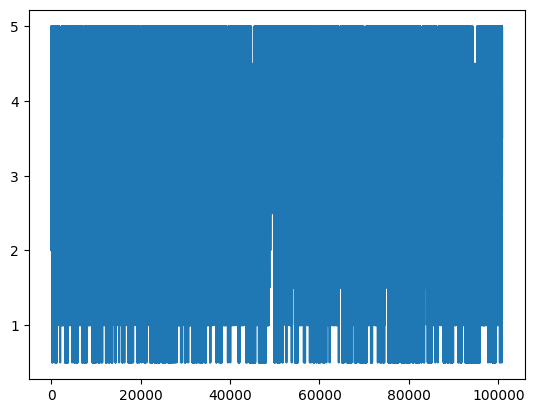

In [8]:
notas.nota.plot() #a impressão visual de um conjunto de dados é chamado de plotar (função plot)
#podemos tbm usar a expressão notas.nota para referenciar a uma coluna sem precisar usar notas["nota"]

<Axes: ylabel='Frequency'>

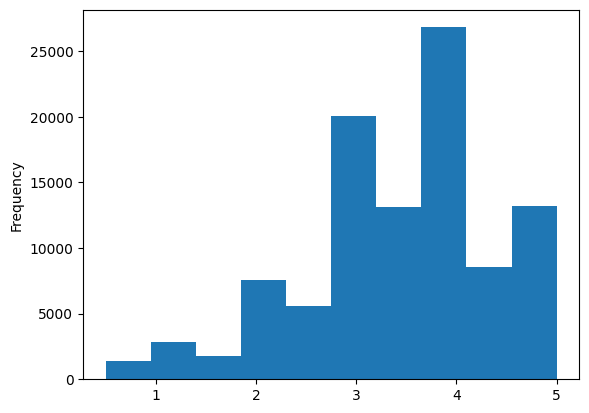

In [9]:
notas.nota.plot(kind="hist") # hist = "história", usamos esse valor para saber quantas vezes cada informação aparece nesse conjunto de dados

In [10]:
notas.nota.describe() #usamos esse metodo para descrever todas essas medidas de uma vez, pedindo a descrisao desse dataframe

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [11]:
import seaborn as sns # biblioteca de vizualização em graficos

<Axes: xlabel='nota'>

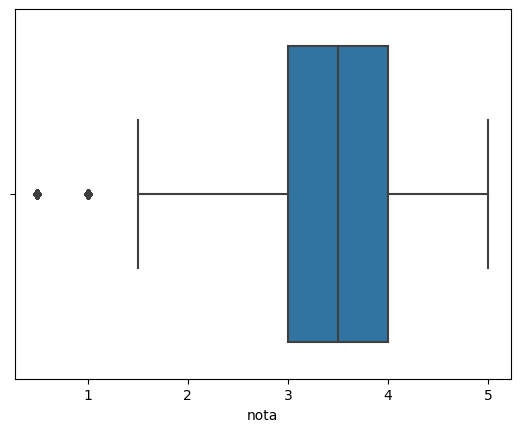

In [12]:
sns.boxplot(x=notas.nota) #nesse graficos podemos ver em azul que a mediana se encontra entre 3 e 4, fora da caixa se encontra os outros 25% de cada lado

# Olhando alguns filmes

In [13]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmesId", "Titulo", "generos"]
filmes.head()

,filmesId,Titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:
notas.query("filmeId==1") # usamos o metodo QUERY para PERGUNTAR, no caso, o Id de Tory Story é 1, e para fazer essa comparação usamos == e não = pq não estamos atribuindo

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


# Olhando alguns filmes em especifico

In [16]:
notas.query("filmeId==1").nota.mean() # para verificar a nota media do filme toy story

3.9209302325581397

In [17]:
notas.query("filmeId==2").nota.mean() #para verificar a nota media do filme Jumanji

3.4318181818181817

In [18]:
medias_por_filme = notas.groupby("filmeId").mean().nota #para agrupar e tirar uma media geral, sem precisar consultar 1 por 1
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

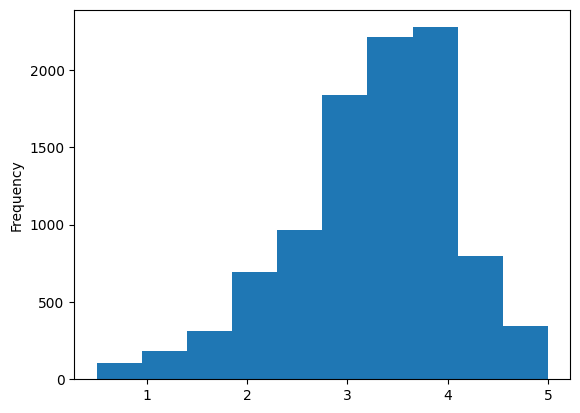

In [19]:
medias_por_filme.plot(kind="hist")

<Axes: xlabel='nota'>

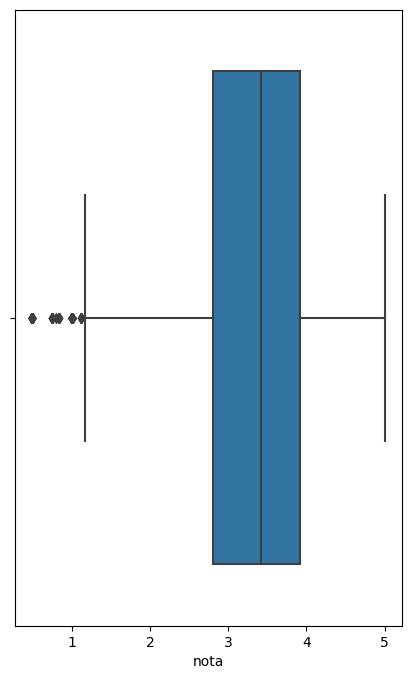

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,8))
sns.boxplot(x=medias_por_filme)

In [21]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

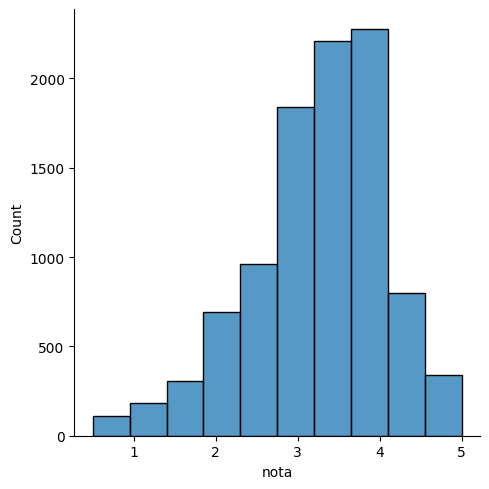

In [22]:
sns.displot(medias_por_filme, bins=10) #bins define a quantidade de barras, mas não é necessario a aplicação pois o seaborn já oferece uma quantidade interessante para o conjunto de dados.

Text(0.5, 1.0, 'Histograma das médias dos filmes')

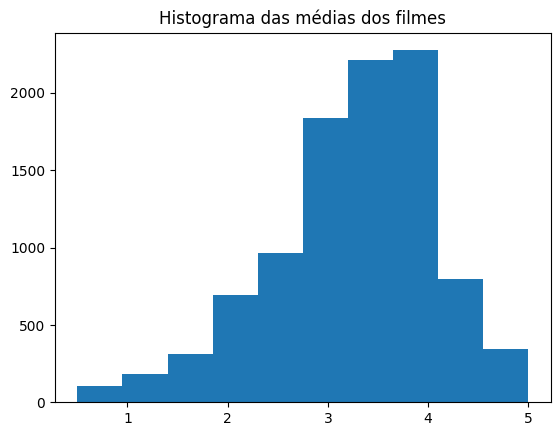

In [23]:
import matplotlib.pyplot as plt # tanto o pandas quanto o seaborn utilizam essa biblioteca para gerar graficos

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")


In [24]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [25]:
tmdb.original_language.value_counts() #ha apenas uma coluna mostrando a serie de dados, as linguas funcionam como index

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [26]:
tmdb.original_language.value_counts().index # as línguas (en, fr, es e assim por diante) estão funcionando como índices (index)

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object')

In [27]:
tmdb.original_language.value_counts().values # e o array de dados propriamente dito é a coluna dos valores.

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [28]:
tmdb.original_language.value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


In [29]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index() # aqui criamos um dataframe e adicionamos um novo index (reset.index).
contagem_de_lingua.columns = ["original_language", "Total"]
contagem_de_lingua.head()


,original_language,Total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='Total'>

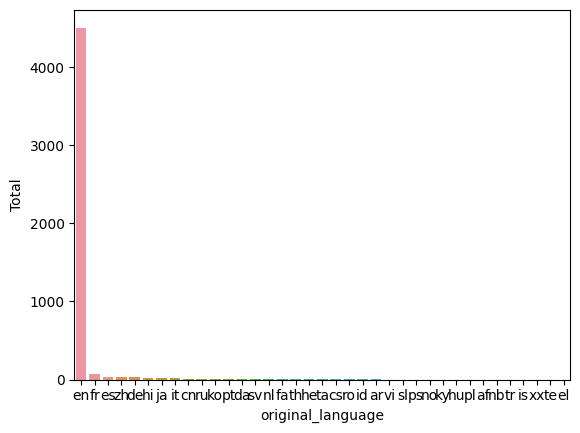

In [30]:
sns.barplot(x="original_language", y="Total", data = contagem_de_lingua) #no eixo x (horizontal) estao as linguas, no eixo y o total. Data são os dados que o grafico esta trabalhando

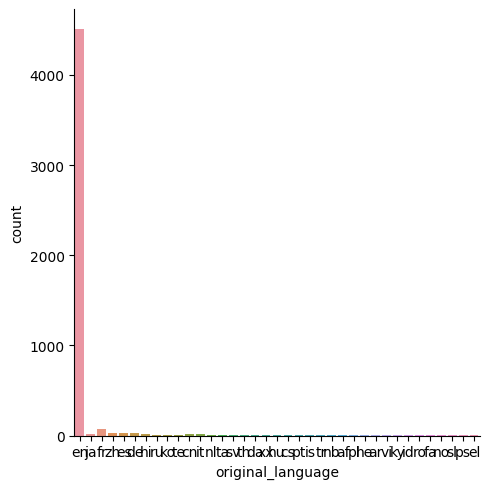

In [31]:
sns.catplot(x="original_language", kind="count", data=tmdb) #catplot = plotar por categoria.
# catplot é uma maneira mais eficiente de plotar dados por catergoria sem precisar fazer todo o trabalho da linha 32

([<matplotlib.patches.Wedge at 0x7d1d39920b20>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

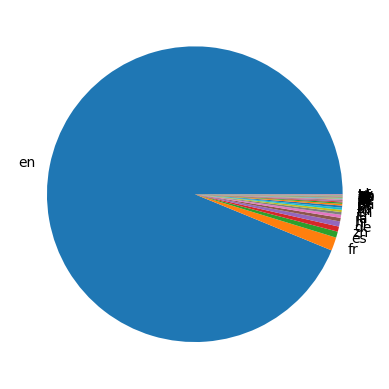

In [32]:
plt.pie(contagem_de_lingua["Total"], labels = contagem_de_lingua["original_language"])

In [33]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum() #sum para somar. aqui ele somou todas as linguas e transformou em um valor só
total_de_ingles = total_por_lingua.loc["en"] # loc para LOCALIZAR o valor de ingles
total_do_resto = total_geral - total_de_ingles # o total do resto são todas as linguas somadas subtraindo o ingles
print(total_de_ingles, total_do_resto)


4505 298


In [34]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)

In [35]:
pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

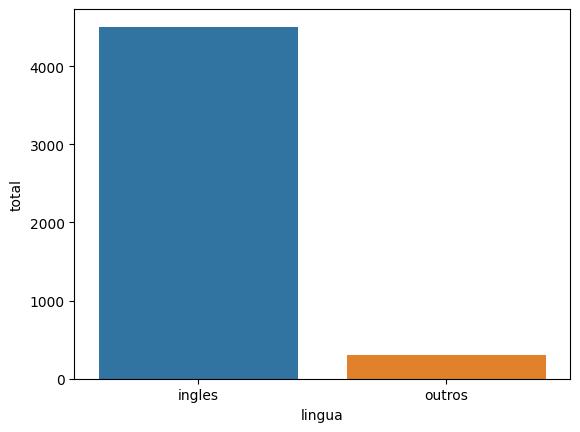

In [36]:
sns.barplot(x='lingua', y='total', data = dados) #sempre utilizamos data dentro de parenteses para definir quais dados queremos apresentar nos graficos

([<matplotlib.patches.Wedge at 0x7d1d39674e20>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

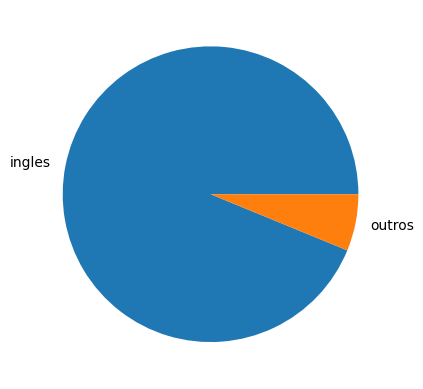

In [37]:
plt.pie(dados["total"], labels = dados["lingua"])
#esse tipo de grafico não é recomendados pois não conseguimos mensurar as quantidades
#podemos apenas fazer uma analise superficial e dizer que o ingles é predominante a outras linguas

In [38]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
print(total_por_lingua_de_outros_filmes)
#utilizamos QUERY para buscar informações dentro da base de dados
# == busca todos os filme em ingles. != busca filmes diferentes do ingles


fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64


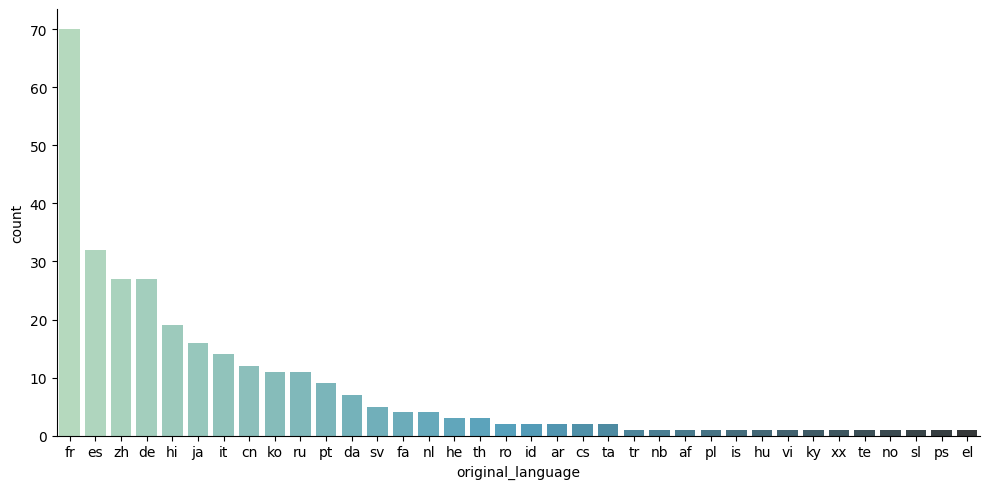

In [39]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles,
            kind="count",
            aspect=2,
            palette="GnBu_d",
            order = total_por_lingua_de_outros_filmes.index)


In [40]:
filmes.head(2) #2 dentro da função nos mmostrara as duas primeiras linhas da base de dados

,filmesId,Titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [41]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [42]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [43]:
print("Mediana do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Mediana do Jumanji %.2f" % notas_do_jumanji.nota.median())

Mediana do Toy Story 4.00
Mediana do Jumanji 3.50


In [44]:
import numpy as np

filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array ([5] * 10), np.array ([1] * 10))


In [45]:
filme1.mean(), filme2.mean()

(3.0, 3.0)

In [46]:
print(np.median(filme1), np.median(filme2))

3.0 3.0


<Axes: xlabel='filmeId', ylabel='nota'>

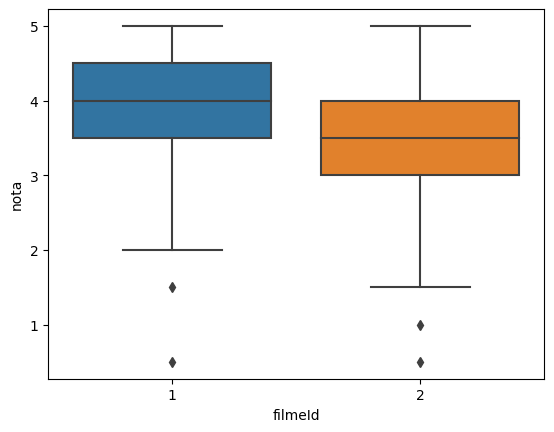

In [47]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in (1,2)"))


<Axes: xlabel='filmeId', ylabel='nota'>

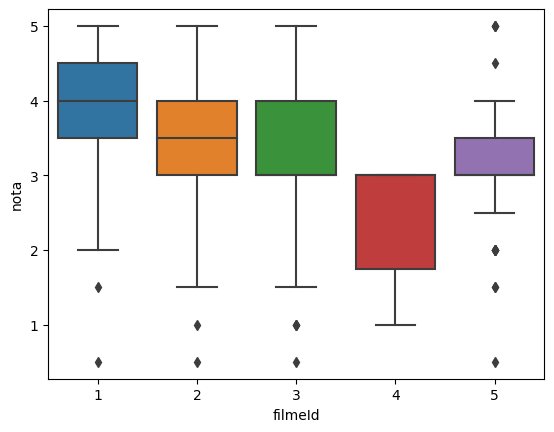

In [48]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in (1,2,3,4,5)"))

In [49]:
print("Desvio padrão do Jumanji %.2f" % notas_do_jumanji.nota.std(), "Desvio padrão do Toy Story %.2f" % notas_do_toy_story.nota.std())

Desvio padrão do Jumanji 0.88 Desvio padrão do Toy Story 0.83


In [50]:
print(np.mean(filme1), np.mean(filme2))
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0
